In [34]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import KFold

from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

import pickle

import math

In [38]:
# Open the pickle file in read-binary mode
with open('grid_search_LR.pkl', 'rb') as file:
    grid_search = pickle.load(file)
print(grid_search.best_params_)
C = grid_search.best_params_['C']
penalty = grid_search.best_params_['penalty']
solve_method = grid_search.best_params_['solver']
data = pd.read_csv('data_averages/running_162_data.csv', low_memory=False)
X = data.iloc[:,2:-1]
y = data.iloc[:,-1:].squeeze()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=142)
model = LogisticRegression(C= C, penalty= penalty, solver = solve_method, max_iter=1000)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
fold_acc = accuracy_score(y_test, y_pred)
print(fold_acc)
print(roc_auc_score(y_test, y_pred))





{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
0.5480238463236917
0.5482270538450313


In [ ]:
#Step 1: Baseline


In [63]:
# Steven's Models
steven = pd.read_csv('val_scores_xgb_svclinear_svc.csv')


# Create dataframes for XGB and SVM models from steven dataframe
XGB = steven[steven['model'] == 'xgb']
SVM = steven[steven['model'] == 'svc']

XGB_sa = XGB[XGB['type'] == 'simple_average']
XGB_wa = XGB[XGB['type'] == 'weighted_average']

SVM_sa = SVM[SVM['type'] == 'simple_average']
SVM_wa = SVM[SVM['type'] == 'weighted_average']

SVM_sa['key']

    model              type    key     value
242   svc    simple_average   1.00  0.536429
243   svc    simple_average   2.00  0.543143
244   svc    simple_average   3.00  0.541857
245   svc    simple_average   4.00  0.543000
246   svc    simple_average   5.00  0.545429
247   svc    simple_average   6.00  0.545714
248   svc    simple_average   7.00  0.545571
249   svc    simple_average   8.00  0.543571
250   svc    simple_average   9.00  0.549000
251   svc    simple_average  10.00  0.542714
252   svc    simple_average  11.00  0.544429
253   svc    simple_average  12.00  0.547571
254   svc    simple_average  13.00  0.546571
255   svc    simple_average  14.00  0.551857
256   svc    simple_average  15.00  0.555571
257   svc    simple_average  16.00  0.555429
258   svc    simple_average  17.00  0.551571
259   svc    simple_average  18.00  0.549714
260   svc    simple_average  19.00  0.547286
261   svc    simple_average  20.00  0.553429
262   svc  weighted_average   0.00  0.555324
263   svc 

242     1.0
243     2.0
244     3.0
245     4.0
246     5.0
247     6.0
248     7.0
249     8.0
250     9.0
251    10.0
252    11.0
253    12.0
254    13.0
255    14.0
256    15.0
257    16.0
258    17.0
259    18.0
260    19.0
261    20.0
Name: key, dtype: float64

Choice of games LR: 14
Choice of games LR: 18
[0.52807898 0.53115391 0.53382972 0.52832632 0.53836193]
[0.52809443 0.53131525 0.53420362 0.52842327 0.53866605]


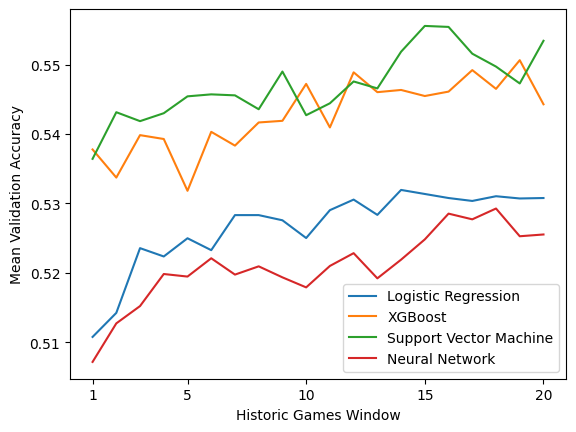

In [68]:
#Step 2: Games window:
LR_step2 = np.load("LR_games_search_acc.npy")
NN_step2 = np.load("NN_val_acc_games_search.npy")

plt.plot(np.linspace(1,20,20), LR_step2.mean(1), label = "Logistic Regression")
plt.plot(XGB_sa['key'], XGB_sa['value'], label = "XGBoost")
plt.plot(SVM_sa['key'], SVM_sa['value'], label = "Support Vector Machine")
plt.plot(np.linspace(1,20,20), NN_step2.mean(1), label = "Neural Network")
plt.xlabel("Historic Games Window")
plt.ylabel("Mean Validation Accuracy")
plt.xticks([1,5,10,15,20])
plt.legend()

LR_best = np.argmax(LR_step2.mean(1))+1
NN_best = np.argmax(NN_step2.mean(1))+1

LR_acc = LR_step2.mean(1)[LR_best-1]
print(f"Choice of games LR: {LR_best}")
print(f"Choice of games LR: {NN_best}")


# Fold results
LR_step2_auc = np.load("LR_games_search_auc.npy")
#NN_step2_auc = np.load("NN_val_auc_games_search.npy")

print(LR_step2[LR_best-1])
print(LR_step2_auc[LR_best-1])
#print(NN_step2_auc[LR_best-1])


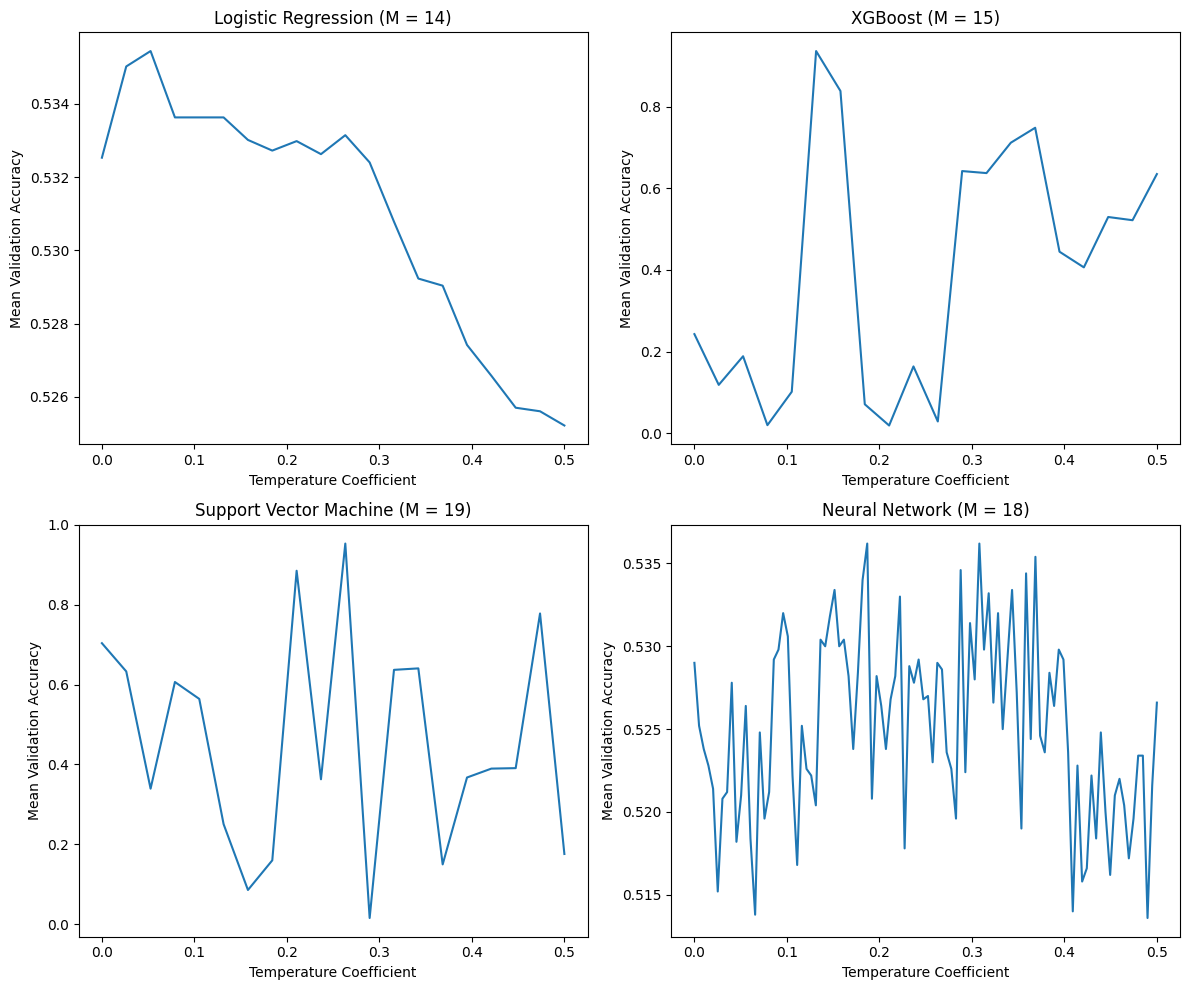

In [101]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data (replace with actual data)
#LR_step3 = np.load("LR_accuracy_wavg.npy")  # Replace with actual Logistic Regression data
# Save LR_step3 array to CSV
LR_step3 = np.loadtxt('LR_step3_accuracy.csv', delimiter=',')

XGB_wa = {'key': np.linspace(0, 0.5, 20), 'value': np.random.rand(20)}  # Replace with actual XGBoost data
SVM_wa = {'key': np.linspace(0, 0.5, 20), 'value': np.random.rand(20)}  # Replace with actual SVM data
NN_step3 = np.loadtxt('NN_step3_accuracy.csv', delimiter=',')
# Save NN_step3 array to CSV



# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# First plot: Logistic Regression
axes[0, 0].plot(np.linspace(0, 0.5, len(LR_step3)), LR_step3.mean(axis=1), label="Logistic Regression (M = 14)")
axes[0, 0].set_title("Logistic Regression (M = 14)")
axes[0, 0].set_xlabel("Temperature Coefficient")
axes[0, 0].set_ylabel("Mean Validation Accuracy")

# Second plot: XGBoost
axes[0, 1].plot(XGB_wa['key'], XGB_wa['value'], label="XGBoost (M = 15)")
axes[0, 1].set_title("XGBoost (M = 15)")
axes[0, 1].set_xlabel("Temperature Coefficient")
axes[0, 1].set_ylabel("Mean Validation Accuracy")

# Third plot: Support Vector Machine
axes[1, 0].plot(SVM_wa['key'], SVM_wa['value'], label="Support Vector Machine (M = 19)")
axes[1, 0].set_title("Support Vector Machine (M = 19)")
axes[1, 0].set_xlabel("Temperature Coefficient")
axes[1, 0].set_ylabel("Mean Validation Accuracy")

# Fourth plot: Neural Network
axes[1, 1].plot(np.linspace(0, 0.5, len(NN_step3)), NN_step3.mean(axis=1), label="Neural Network (18)")
axes[1, 1].set_title("Neural Network (M = 18)")
axes[1, 1].set_xlabel("Temperature Coefficient")
axes[1, 1].set_ylabel("Mean Validation Accuracy")

# Adjust layout
plt.tight_layout()
plt.show()


In [103]:
auc = np.load("Baseline_search_acc.npy")

np.savetxt('Baseline_search_acc.csv', auc, delimiter=',')

